In [13]:
# import necessary libraries
import pandas as pd 
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
import scikitplot as skl
sns.set()
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns',None)

In [14]:
# Reading the data 
df=pd.read_csv('diabetes.csv',delimiter=' *, *')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [15]:
df.shape

(768, 9)

In [16]:
df.describe() 

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


# Preprocessing The Data 

In [17]:
#Create copy of the dataframe
data=pd.DataFrame.copy(df)

In [18]:
# finding missing value in data
data.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

There is no missing value in dataset 

In [19]:
#check type of the dataset 
data.dtypes

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

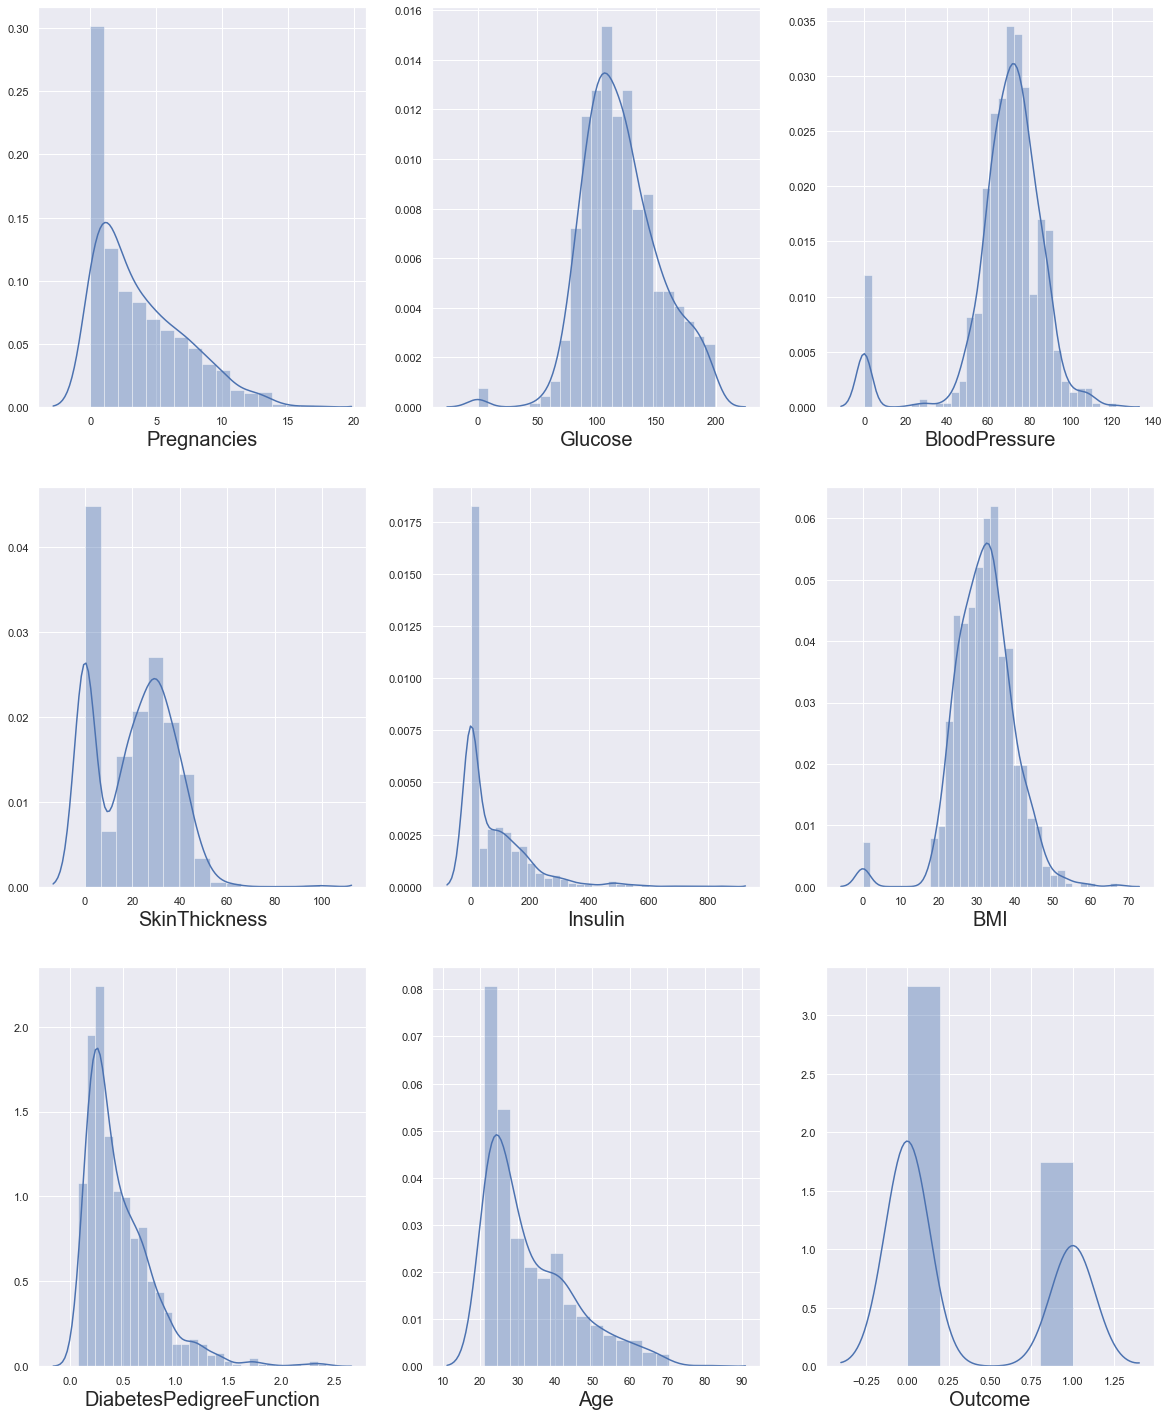

In [20]:
# check see how data is distibuted for every columns
plt.figure(figsize=(20,25))
plotnumber=1

for column in data:
    if plotnumber<=9:
        ax=plt.subplot(3,3,plotnumber)
        sns.distplot(data[column])
        plt.xlabel(column,fontsize=20)
        plotnumber+=1
plt.show()        
    

as per above graph there is some skew in the data.as per data there is few data for columns glucose,insulin,SkinThickness,BMI and blood pressure
which have value 0.that is not possible biologically so that 0 values we can replace with mean values of the that column 

In [21]:
# replace zero value with mean value of the column
data['BMI']=data['BMI'].replace(0,data['BMI'].mean())
data['BloodPressure']=data['BloodPressure'].replace(0,data['BloodPressure'].mean())
data['Glucose']=data['Glucose'].replace(0,data['Glucose'].mean())
data['Insulin']=data['Insulin'].replace(0,data['Insulin'].mean())
data['SkinThickness']=data['SkinThickness'].replace(0,data['SkinThickness'].mean())

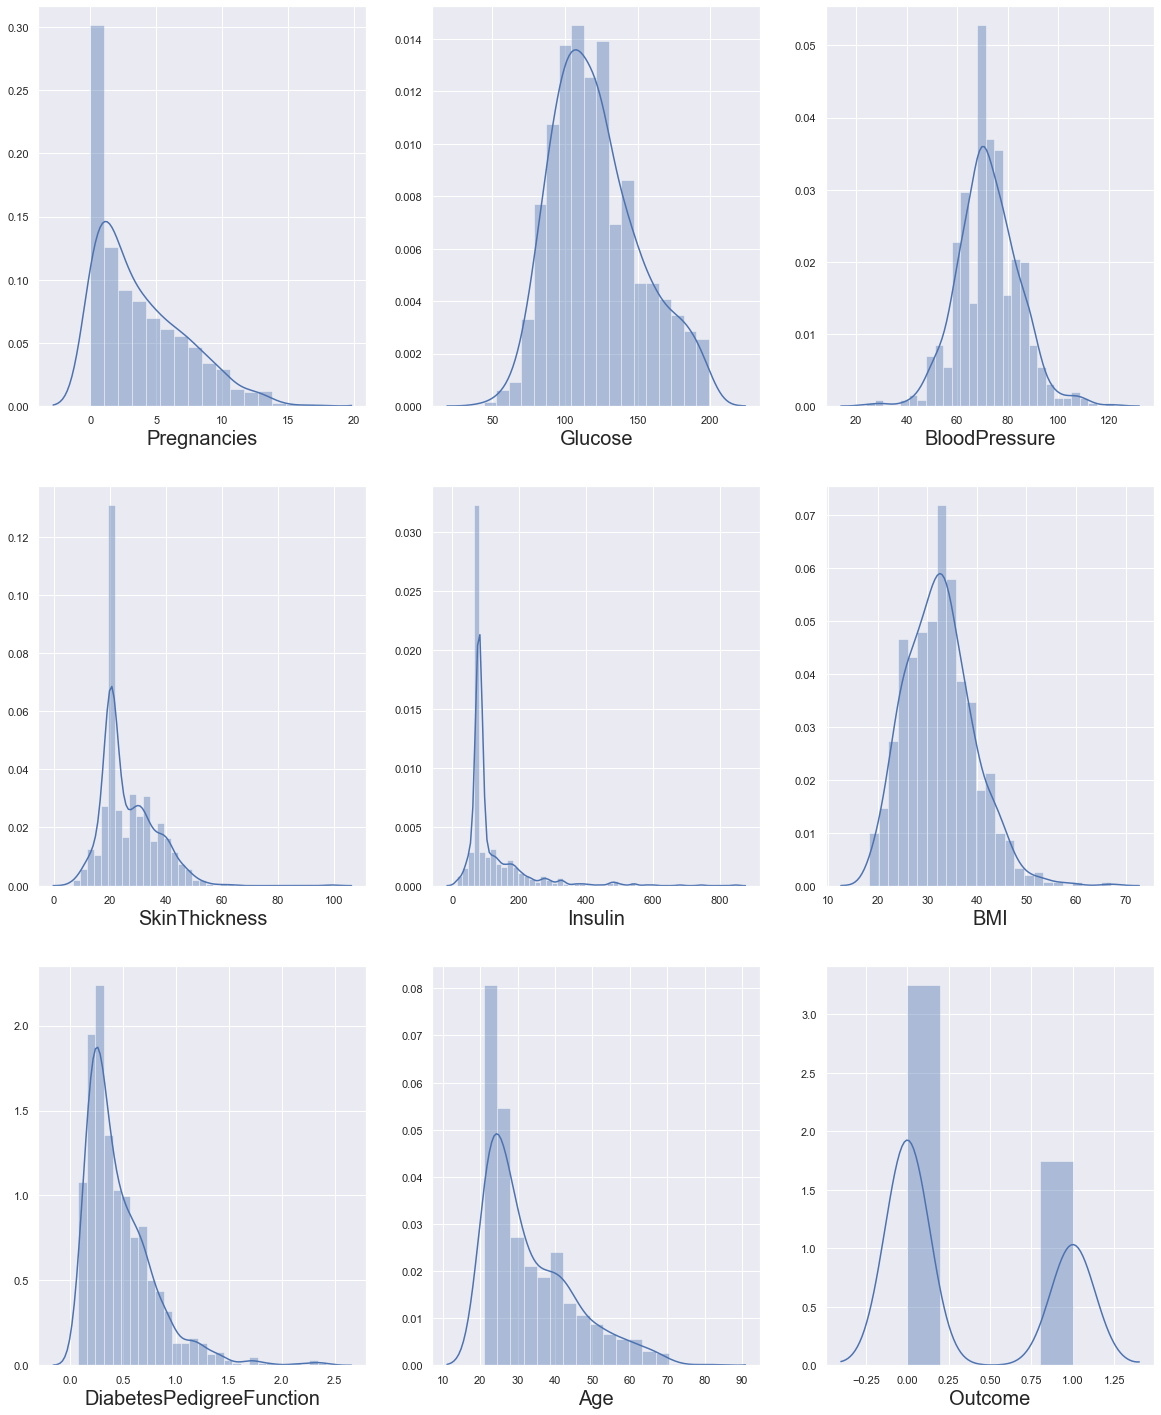

In [22]:
# lets again check see how data is distibuted for every columns
plt.figure(figsize=(20,25))
plotnumber=1

for column in data:
    if plotnumber<=9:
        ax=plt.subplot(3,3,plotnumber)
        sns.distplot(data[column])
        plt.xlabel(column,fontsize=20)
        plotnumber+=1
plt.show()        
    

In [23]:
# Split data into x and y
x=data.drop(columns=['Outcome'])
y=data['Outcome']

In [30]:
# scaling the data
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x_scaled=scaler.fit_transform(x)

In [31]:
x_scaled

array([[ 0.63994726,  0.86527574, -0.0210444 , ...,  0.16725546,
         0.46849198,  1.4259954 ],
       [-0.84488505, -1.20598931, -0.51658286, ..., -0.85153454,
        -0.36506078, -0.19067191],
       [ 1.23388019,  2.01597855, -0.68176235, ..., -1.33182125,
         0.60439732, -0.10558415],
       ...,
       [ 0.3429808 , -0.02240928, -0.0210444 , ..., -0.90975111,
        -0.68519336, -0.27575966],
       [-0.84488505,  0.14197684, -1.01212132, ..., -0.34213954,
        -0.37110101,  1.17073215],
       [-0.84488505, -0.94297153, -0.18622389, ..., -0.29847711,
        -0.47378505, -0.87137393]])

In [41]:
# check there should be no multicolinarity in data 
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif=pd.DataFrame()
vif['feature']=x.columns
vif['vif']=[variance_inflation_factor(x_scaled,i)for i in range(x_scaled.shape[1])]
vif

,feature,vif
0,Pregnancies,1.431075
1,Glucose,1.347308
2,BloodPressure,1.247914
3,SkinThickness,1.450510
4,Insulin,1.262111
5,BMI,1.550227
6,DiabetesPedigreeFunction,1.058104
7,Age,1.605441


All values are less then 5 so that means their is no multicollinarity in these data

# Build The Model 

In [45]:
#Split the data into two part 
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x_scaled,y,test_size=0.25,random_state=355) 

In [47]:
#Create the model
from sklearn.linear_model import LogisticRegression
log_reg=LogisticRegression()
log_reg.fit(x_train,y_train)

#predict the model
y_pred=log_reg.predict(x_test)
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1,
       1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0,
       1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0], dtype=int64)

In [49]:
# compare actual value and predicted values
print(list(zip(y_test,y_pred)))

[(0, 0), (0, 0), (1, 0), (0, 0), (0, 0), (1, 0), (1, 0), (0, 0), (1, 0), (0, 0), (0, 0), (0, 0), (0, 0), (1, 1), (1, 1), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (1, 1), (1, 0), (0, 0), (0, 0), (1, 0), (1, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 1), (1, 1), (1, 0), (1, 0), (0, 0), (1, 0), (0, 0), (1, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 1), (1, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (1, 1), (1, 0), (1, 0), (0, 1), (0, 0), (1, 0), (0, 0), (1, 1), (0, 0), (0, 0), (0, 0), (1, 1), (0, 1), (1, 1), (1, 1), (1, 1), (0, 0), (0, 0), (0, 0), (1, 0), (0, 0), (1, 1), (0, 1), (0, 0), (1, 0), (0, 0), (1, 1), (0, 0), (0, 0), (1, 1), (0, 0), (0, 0), (0, 0), (0, 1), (0, 0), (0, 0), (1, 1), (0, 0), (0, 0), (1, 1), (0, 0), (0, 0), (0, 0), (0, 0), (0, 1), (0, 0), (1, 0), (1, 0), (0, 0), (0, 0), (1, 1), (0, 0), (0, 0), (0, 0), (0, 1), (0, 0), (0, 0), (0, 0), (0, 0), (0, 1), (0, 0), (0, 0), (1, 1), (1, 1), (1, 1), (1, 0), (1, 0), (1, 0), (0, 0), (0, 0), (1, 0), (0, 0), (1, 0), (1, 1),

In [51]:
# Find slop coefficient value
print(list(zip(data.columns[:-1],log_reg.coef_.ravel())))

[('Pregnancies', 0.4695030787867104), ('Glucose', 1.1686464023375125), ('BloodPressure', -0.10231931575109147), ('SkinThickness', -0.07748610356946435), ('Insulin', -0.18464034416275213), ('BMI', 0.6434756135750525), ('DiabetesPedigreeFunction', 0.28978355060541255), ('Age', 0.19847828627695271)]


# Evaluation of the model

In [55]:
# check accuracy of the model
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
cfm=confusion_matrix(y_test,y_pred)
print(cfm)

# check classification report
print("Classification Report")
print(classification_report(y_test,y_pred))


#check accuracy score of the metrics
acc=accuracy_score(y_test,y_pred)
print(acc)


[[110  15]
 [ 32  35]]
Classification Report
              precision    recall  f1-score   support

           0       0.77      0.88      0.82       125
           1       0.70      0.52      0.60        67

    accuracy                           0.76       192
   macro avg       0.74      0.70      0.71       192
weighted avg       0.75      0.76      0.75       192

0.7552083333333334


In [56]:
# save model into pickle format
import pickle
with open('DiabetesModelForPrediction.sav','wb')as f:
    pickle.dump(log_reg,f)
    
with open('standardScaler.sav','wb')as f :
    pickle.dump(scaler,f)


In [61]:
y_pred=log_reg.predict([[.343,.45,.45,.345,.345,.243,.234,.45]])
y_pred

array([1], dtype=int64)